## Procesamiento de Datos y Visualización con Python
### Ejercicio MATPLOTLIB

Obtén un diagrama de barras de las cinco primeras fechas del dataset para los precios de apertura y cierre. 

In [1]:
# Leer bibliotecas de Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer archivos
AAPL = pd.read_csv("AAPL.csv")
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000
mean,151.216673,153.017789,149.103336,151.108138,2.151112e+07,140.505248
std,165.485538,166.815882,163.681717,165.277867,1.482164e+07,165.408965
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.380000
25%,24.592500,25.060000,24.092500,24.712500,1.159570e+07,12.020000
50%,85.415000,86.500000,84.355000,85.340000,1.730015e+07,72.410000
75%,198.957500,200.762500,196.027500,198.010000,2.744490e+07,192.572500
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,685.760000


In [2]:
# Obtener un poco más de información sobre la estructura
AAPL.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3270 non-null   object 
 1   Open       3270 non-null   float64
 2   High       3270 non-null   float64
 3   Low        3270 non-null   float64
 4   Close      3270 non-null   float64
 5   Volume     3270 non-null   int64  
 6   Adj Close  3270 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 179.0+ KB


__NOTA:__ Cuando leemos el archivo, las fechas no pasan como fechas sino que pasan como _strings_, que en Python es una primitiva para el tipo _OBJECT_. Hay que transformar las fechas en fechas reales usando `pd.to_datetime()`. 

In [4]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AAPL['Date'].head()

0   2000-03-01
1   2000-03-02
2   2000-03-03
3   2000-03-06
4   2000-03-07
Name: Date, dtype: datetime64[ns]

Todavía no terminamos. Ahora tenemos que crear un dataframe sencillo para pasar a `plot` y cuyos índices sean las fechas. El método `drop` de _Pandas_ usa la clave de eje para saber si es fila o columna. Adicionalmente en el comando para reestablecer la clave hay que indicar que lo haga `inplace` o sino lo copia a un nuevo objeto. 

In [5]:
# Transformar data to plot así MatPlotLib no se atasca
data = AAPL.copy()
data = data.drop(['High', 'Low', 'Volume', 'Adj Close'], axis = 1)
data.set_index('Date', inplace = True)
data.head(4)

,Open,Close
Date,,
2000-03-01,118.56,130.31
2000-03-02,127.00,122.00
2000-03-03,124.87,128.00
2000-03-06,126.00,125.69


Finalmente, el cuadro esperado:

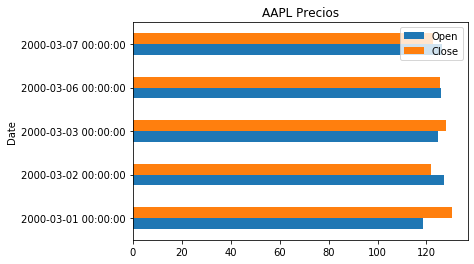

In [7]:
data.head(5).plot(kind = "barh", title = "AAPL Precios")

__Nota:__ Este es uno de los ejercicios que más me costó resolver, y tuve que dejarlo para el final de la semana porque no encontraba la solución adecuada (julio-12-2020).